# **데이터 다운로드**


In [11]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/SKI_W1_PROJECT_DATA1.xlsx
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/SKI_W1_PROJECT_DATA2.csv

--2022-08-17 01:04:14--  http://sk.jaen.kr:8080/SKI_W1_PROJECT_DATA1.xlsx
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 200 OK
Length: 12445372 (12M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘SKI_W1_PROJECT_DATA1.xlsx’

SKI_W1_PROJECT_DATA 100%[===================>]  11.87M  17.2MB/s    in 0.7s    

2022-08-17 01:04:15 (17.2 MB/s) - ‘SKI_W1_PROJECT_DATA1.xlsx’ saved [12445372/12445372]

--2022-08-17 01:04:15--  http://sk.jaen.kr:8080/SKI_W1_PROJECT_DATA2.csv
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basi

# **폰트 설치 및 적용** 
 - 아래의 코드 셀을 실행 후 런타임 > 런타임 다시 시작 클릭 후 모듈 설정 부터 시작

In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
print('[설정 완료] 런타임 메뉴에서 런타임 다시 시작을 클릭하기')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,900 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# **모듈설정**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 설정
plt.rcParams['axes.unicode_minus'] = False   # - 기호 출력
plt.rc('font', family='NanumBarunGothic')    # 시각화를 위한 한글 폰트 지정

# 1. 법정동 코드 가공

In [2]:
# SKI_W1_PROJECT_DATA2.csv 데이터 읽기.
# 데이터 구분자 sep=':', encoding='cp949'

locCode = pd.read_csv('SKI_W1_PROJECT_DATA2.csv',  encoding='cp949', sep=":")
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [3]:
#읍면동명이 NaN인 데이터를 추출하기
locCode_f1 = locCode[locCode['읍면동명'].isna()]
locCode_f1.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN


In [4]:
# 추출한 데이터 중 시군구명이 NaN이 아닌 데이터를 추출하기
locCode_f2 = locCode_f1[locCode_f1['시군구명'].notna()]
locCode_f2.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN


In [5]:
# '법정동코드' 열의 값 중 앞 5자리를 추출하여 정수 형태로 '지역코드' 열에 저장
# 예) 서울특별시 종로구 > 11000

## 
# first, check the type
locCode_f2.dtypes   #법정동코드 is an int64 type

#change the '법정동코드' to a string type
locCode_f2['지역코드']=locCode_f2['법정동코드'].astype('string').str[:5].astype('int64')

#final check
locCode_f2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN,11110
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN,11140
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN,11170
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN,11200
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN,11215
...,...,...,...,...,...,...,...,...
19906,4887000000,경상남도,함양군,NaN,NaN,19880423,NaN,48870
20021,4888000000,경상남도,거창군,NaN,NaN,19880423,NaN,48880
20128,4889000000,경상남도,합천군,NaN,NaN,19880423,NaN,48890
20339,5011000000,제주특별자치도,제주시,NaN,NaN,20060701,NaN,50110


In [6]:
# 위 데이터 중 서울특별시에 소속된 데이터만 추출
# 추출은 시도명, 시군구명, 지역코드로 한정

# subset 'Seoul' only
locCode_f2_Seoul = locCode_f2[locCode_f2["시도명"].isin(["서울특별시"])]

#subset 시도명, 시군구명, 지역코드
locCode_f2_Seoul= locCode_f2_Seoul[['시도명','시군구명','지역코드']]
locCode_f2_Seoul

,시도명,시군구명,지역코드
1,서울특별시,종로구,11110
89,서울특별시,중구,11140
164,서울특별시,용산구,11170
201,서울특별시,성동구,11200
219,서울특별시,광진구,11215
227,서울특별시,동대문구,11230
238,서울특별시,중랑구,11260
245,서울특별시,성북구,11290
285,서울특별시,강북구,11305
290,서울특별시,도봉구,11320


# 2. 실거래가 데이터 가공

In [7]:
# SKI_W1_PROJECT_DATA1.xlsx 파일의 모든 시트를 읽어온 후(sheet_name=None) apt변수에 저장
apt= pd.read_excel('SKI_W1_PROJECT_DATA1.xlsx', sheet_name=None)

# apt변수의 키를 조회해보기. : 각각의 key가 연도별 df를 의미함
apt.keys()

dict_keys(['2018', '2019', '2020'])

In [8]:
# 3개의 데이터 프레임(3개년도 데이터)을 하나로 병합
#just as a reference, divide into each 2018, 2019, 2020 yr
apt_2018 = apt['2018']
apt_2019 = apt['2019']
apt_2020 = apt['2020']

apt_all = [apt_2018,apt_2019,apt_2020]
apt_merged = pd.concat(apt_all)
apt_merged

,Unnamed: 0,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자
0,0,"80,000",2003,역삼동,세방하이빌1,59.7700,771-4,11680,5,2018-01-01
1,1,"67,000",2012,금호동3가,금호자이2차,59.9912,700,11200,8,2018-01-01
2,2,"66,500",2008,진관동,은평뉴타운상림마을(현대아이파크B-14),134.7500,10,11380,8,2018-01-01
3,3,"35,700",1994,신사동,현대2,84.8300,355,11380,9,2018-01-01
4,4,"59,000",2006,신대방동,성원상떼빌,84.9800,719,11590,20,2018-01-01
...,...,...,...,...,...,...,...,...,...,...
81053,81053,"89,500",2010,길음동,길음뉴타운7단지(두산위브),59.9900,1285,11290,9,2020-12-31
81054,81054,"85,000",2003,길음동,길음뉴타운1단지(래미안길음1차),59.9900,1279,11290,8,2020-12-31
81055,81055,"86,000",2003,길음동,길음동동부센트레빌(1278-0),84.8440,1278,11290,15,2020-12-31
81056,81056,"83,000",2000,이문동,현대,84.5600,54,11230,19,2020-12-31


In [9]:
# 인덱스를 초기화하기. (기존 인덱스는 제거.)
apt_merged.reset_index(drop=True, inplace=True) #delete the unnecessary column
apt_merged

,Unnamed: 0,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자
0,0,"80,000",2003,역삼동,세방하이빌1,59.7700,771-4,11680,5,2018-01-01
1,1,"67,000",2012,금호동3가,금호자이2차,59.9912,700,11200,8,2018-01-01
2,2,"66,500",2008,진관동,은평뉴타운상림마을(현대아이파크B-14),134.7500,10,11380,8,2018-01-01
3,3,"35,700",1994,신사동,현대2,84.8300,355,11380,9,2018-01-01
4,4,"59,000",2006,신대방동,성원상떼빌,84.9800,719,11590,20,2018-01-01
...,...,...,...,...,...,...,...,...,...,...
237414,81053,"89,500",2010,길음동,길음뉴타운7단지(두산위브),59.9900,1285,11290,9,2020-12-31
237415,81054,"85,000",2003,길음동,길음뉴타운1단지(래미안길음1차),59.9900,1279,11290,8,2020-12-31
237416,81055,"86,000",2003,길음동,길음동동부센트레빌(1278-0),84.8440,1278,11290,15,2020-12-31
237417,81056,"83,000",2000,이문동,현대,84.5600,54,11230,19,2020-12-31


In [10]:
# 컬럼명을 출력
apt_merged.columns

Index(['Unnamed: 0', '거래금액', '건축년도', '법정동', '아파트', '전용면적', '지번', '지역코드', '층',
       '거래일자'],
      dtype='object')

In [11]:
# 불필요한 컬럼인 'Unnamed: 0'을 제거.

apt_merged=apt_merged.drop('Unnamed: 0', axis=1)
apt_merged


,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자
0,"80,000",2003,역삼동,세방하이빌1,59.7700,771-4,11680,5,2018-01-01
1,"67,000",2012,금호동3가,금호자이2차,59.9912,700,11200,8,2018-01-01
2,"66,500",2008,진관동,은평뉴타운상림마을(현대아이파크B-14),134.7500,10,11380,8,2018-01-01
3,"35,700",1994,신사동,현대2,84.8300,355,11380,9,2018-01-01
4,"59,000",2006,신대방동,성원상떼빌,84.9800,719,11590,20,2018-01-01
...,...,...,...,...,...,...,...,...,...
237414,"89,500",2010,길음동,길음뉴타운7단지(두산위브),59.9900,1285,11290,9,2020-12-31
237415,"85,000",2003,길음동,길음뉴타운1단지(래미안길음1차),59.9900,1279,11290,8,2020-12-31
237416,"86,000",2003,길음동,길음동동부센트레빌(1278-0),84.8440,1278,11290,15,2020-12-31
237417,"83,000",2000,이문동,현대,84.5600,54,11230,19,2020-12-31


In [12]:
# 데이터의 크기를 조회 (shape)
print("크기:", apt_merged.shape)

크기: (237419, 9)


In [13]:
# 각 열 별로 누락 데이터가 있는지 확인
apt_merged.isnull().sum() 

거래금액      0
건축년도      0
법정동       0
아파트       0
전용면적      0
지번      115
지역코드      0
층         0
거래일자      0
dtype: int64

In [14]:
# 데이터의 정보를 출력
apt_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237419 entries, 0 to 237418
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   거래금액    237419 non-null  object        
 1   건축년도    237419 non-null  int64         
 2   법정동     237419 non-null  object        
 3   아파트     237419 non-null  object        
 4   전용면적    237419 non-null  float64       
 5   지번      237304 non-null  object        
 6   지역코드    237419 non-null  int64         
 7   층       237419 non-null  int64         
 8   거래일자    237419 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 16.3+ MB


In [18]:
# object 타입인 '거래금액' 열을 정수 (int64)로 변경


apt_merged['거래금액']=apt_merged['거래금액'].replace(",","").astype('int64')

In [19]:
# 데이터의 정보를 출력하여 '거래금액' 열의 타입이 변경됐는지 확인
apt_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237419 entries, 0 to 237418
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   거래금액    237419 non-null  int64         
 1   건축년도    237419 non-null  int64         
 2   법정동     237419 non-null  object        
 3   아파트     237419 non-null  object        
 4   전용면적    237419 non-null  float64       
 5   지번      237304 non-null  object        
 6   지역코드    237419 non-null  int64         
 7   층       237419 non-null  int64         
 8   거래일자    237419 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 16.3+ MB


In [20]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.305785)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시.
# '전용면적(제곱미터)' 열을 이용하여 '전용면적(평)' 열을 추가
# 변환 공식: 전용면적(제곱미터)/3.305785
# '전용면적(평)'의 값은 소수점 둘째자리까지만 표기

apt_merged['전용면적(평)'] = apt_merged['전용면적']/3.305785
apt_merged['전용면적(평)'] = apt_merged['전용면적(평)'].round(2)
apt_merged





,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자,전용면적(평)
0,80000,2003,역삼동,세방하이빌1,59.7700,771-4,11680,5,2018-01-01,18.08
1,67000,2012,금호동3가,금호자이2차,59.9912,700,11200,8,2018-01-01,18.15
2,66500,2008,진관동,은평뉴타운상림마을(현대아이파크B-14),134.7500,10,11380,8,2018-01-01,40.76
3,35700,1994,신사동,현대2,84.8300,355,11380,9,2018-01-01,25.66
4,59000,2006,신대방동,성원상떼빌,84.9800,719,11590,20,2018-01-01,25.71
...,...,...,...,...,...,...,...,...,...,...
237414,89500,2010,길음동,길음뉴타운7단지(두산위브),59.9900,1285,11290,9,2020-12-31,18.15
237415,85000,2003,길음동,길음뉴타운1단지(래미안길음1차),59.9900,1279,11290,8,2020-12-31,18.15
237416,86000,2003,길음동,길음동동부센트레빌(1278-0),84.8440,1278,11290,15,2020-12-31,25.67
237417,83000,2000,이문동,현대,84.5600,54,11230,19,2020-12-31,25.58


In [21]:
# 전용면적(평)의 최솟값과 최댓값을 조회
apt_merged['전용면적(평)'].agg(['min','max'])

min      3.03
max    119.51
Name: 전용면적(평), dtype: float64

In [22]:
# '전용면적(평)'를 범주화하기 위한 구간을 생성
# 구간은 0부터 120까지 일정한 간격(12)으로 값을 생성
# 데이터 타입은 정수로 설 (int64)
daterange = np.linspace(0, 120, 13).astype('int64')
daterange

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120])

In [23]:
# 생성한 범위 값을 이용하여 '전용면적(평)'를 범주화하여 '평형대'을 추가
apt_merged['평형대'] = pd.cut(apt_merged['전용면적(평)'], daterange)
apt_merged.head() # (은 이상, ]은 미만을 의미




,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자,전용면적(평),평형대
0,80000,2003,역삼동,세방하이빌1,59.7700,771-4,11680,5,2018-01-01,18.08,"(10, 20]"
1,67000,2012,금호동3가,금호자이2차,59.9912,700,11200,8,2018-01-01,18.15,"(10, 20]"
2,66500,2008,진관동,은평뉴타운상림마을(현대아이파크B-14),134.7500,10,11380,8,2018-01-01,40.76,"(40, 50]"
3,35700,1994,신사동,현대2,84.8300,355,11380,9,2018-01-01,25.66,"(20, 30]"
4,59000,2006,신대방동,성원상떼빌,84.9800,719,11590,20,2018-01-01,25.71,"(20, 30]"


In [24]:
# 거래일자 컬럼에서 년, 월, 주차를 분리

#Year column
apt_merged['거래일자_년'] = apt_merged['거래일자'].dt.year #you can subset 'year' only from the datetime series

#Month
apt_merged['거래일자_월'] = apt_merged['거래일자'].dt.month

#주차
apt_merged['거래일자_주차'] = apt_merged['거래일자'].dt.week.shift(-2).ffill()

apt_merged



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자,전용면적(평),평형대,거래일자_년,거래일자_월,거래일자_주차
0,80000,2003,역삼동,세방하이빌1,59.7700,771-4,11680,5,2018-01-01,18.08,"(10, 20]",2018,1,1.0
1,67000,2012,금호동3가,금호자이2차,59.9912,700,11200,8,2018-01-01,18.15,"(10, 20]",2018,1,1.0
2,66500,2008,진관동,은평뉴타운상림마을(현대아이파크B-14),134.7500,10,11380,8,2018-01-01,40.76,"(40, 50]",2018,1,1.0
3,35700,1994,신사동,현대2,84.8300,355,11380,9,2018-01-01,25.66,"(20, 30]",2018,1,1.0
4,59000,2006,신대방동,성원상떼빌,84.9800,719,11590,20,2018-01-01,25.71,"(20, 30]",2018,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237414,89500,2010,길음동,길음뉴타운7단지(두산위브),59.9900,1285,11290,9,2020-12-31,18.15,"(10, 20]",2020,12,53.0
237415,85000,2003,길음동,길음뉴타운1단지(래미안길음1차),59.9900,1279,11290,8,2020-12-31,18.15,"(10, 20]",2020,12,53.0
237416,86000,2003,길음동,길음동동부센트레빌(1278-0),84.8440,1278,11290,15,2020-12-31,25.67,"(20, 30]",2020,12,53.0
237417,83000,2000,이문동,현대,84.5600,54,11230,19,2020-12-31,25.58,"(20, 30]",2020,12,53.0


In [25]:
# '거래일자_월'이 7월 전이면 상반기, 7월 이후면 하반기로 설정하여 '반기' 열을 추가
apt_merged.loc[apt_merged['거래일자_월']<7, '반기']='상반기'
apt_merged.loc[apt_merged['거래일자_월']>=7, '반기']='하반기'
apt_merged

,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자,전용면적(평),평형대,거래일자_년,거래일자_월,거래일자_주차,반기
0,80000,2003,역삼동,세방하이빌1,59.7700,771-4,11680,5,2018-01-01,18.08,"(10, 20]",2018,1,1.0,상반기
1,67000,2012,금호동3가,금호자이2차,59.9912,700,11200,8,2018-01-01,18.15,"(10, 20]",2018,1,1.0,상반기
2,66500,2008,진관동,은평뉴타운상림마을(현대아이파크B-14),134.7500,10,11380,8,2018-01-01,40.76,"(40, 50]",2018,1,1.0,상반기
3,35700,1994,신사동,현대2,84.8300,355,11380,9,2018-01-01,25.66,"(20, 30]",2018,1,1.0,상반기
4,59000,2006,신대방동,성원상떼빌,84.9800,719,11590,20,2018-01-01,25.71,"(20, 30]",2018,1,1.0,상반기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237414,89500,2010,길음동,길음뉴타운7단지(두산위브),59.9900,1285,11290,9,2020-12-31,18.15,"(10, 20]",2020,12,53.0,하반기
237415,85000,2003,길음동,길음뉴타운1단지(래미안길음1차),59.9900,1279,11290,8,2020-12-31,18.15,"(10, 20]",2020,12,53.0,하반기
237416,86000,2003,길음동,길음동동부센트레빌(1278-0),84.8440,1278,11290,15,2020-12-31,25.67,"(20, 30]",2020,12,53.0,하반기
237417,83000,2000,이문동,현대,84.5600,54,11230,19,2020-12-31,25.58,"(20, 30]",2020,12,53.0,하반기


In [26]:
# 거래월'이 1-3월이면 1분기, 4-6월이면 2분기, 7-9월이면 3분기, 
# 10-12월이면 4분기로 설정하여 '분기' 열을 추가

# initialize list of lists 
def quarter(x):
  if x < 4:
    return "1분기"
  elif x < 7:
    return "2분기"
  elif x < 10:
    return "3분기"
  else:
    return "4분기"

apt_merged["분기"] = apt_merged["거래일자_월"].apply(lambda x: quarter(x))
apt_merged

,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자,전용면적(평),평형대,거래일자_년,거래일자_월,거래일자_주차,반기,분기
0,80000,2003,역삼동,세방하이빌1,59.7700,771-4,11680,5,2018-01-01,18.08,"(10, 20]",2018,1,1.0,상반기,1분기
1,67000,2012,금호동3가,금호자이2차,59.9912,700,11200,8,2018-01-01,18.15,"(10, 20]",2018,1,1.0,상반기,1분기
2,66500,2008,진관동,은평뉴타운상림마을(현대아이파크B-14),134.7500,10,11380,8,2018-01-01,40.76,"(40, 50]",2018,1,1.0,상반기,1분기
3,35700,1994,신사동,현대2,84.8300,355,11380,9,2018-01-01,25.66,"(20, 30]",2018,1,1.0,상반기,1분기
4,59000,2006,신대방동,성원상떼빌,84.9800,719,11590,20,2018-01-01,25.71,"(20, 30]",2018,1,1.0,상반기,1분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237414,89500,2010,길음동,길음뉴타운7단지(두산위브),59.9900,1285,11290,9,2020-12-31,18.15,"(10, 20]",2020,12,53.0,하반기,4분기
237415,85000,2003,길음동,길음뉴타운1단지(래미안길음1차),59.9900,1279,11290,8,2020-12-31,18.15,"(10, 20]",2020,12,53.0,하반기,4분기
237416,86000,2003,길음동,길음동동부센트레빌(1278-0),84.8440,1278,11290,15,2020-12-31,25.67,"(20, 30]",2020,12,53.0,하반기,4분기
237417,83000,2000,이문동,현대,84.5600,54,11230,19,2020-12-31,25.58,"(20, 30]",2020,12,53.0,하반기,4분기


In [27]:
# '전용면적(평)' 열을 이용하여 '평당거래금액' 열을 생성

apt_merged.info() #거래금액 int64, 전용면적(평) float64 기 때문에 맞춰서 계산하기


# # apt_merged['price']=pd.to_numeric(pro_df['price'], errors='coerce')
# # apt_merged
apt_merged['평당거래금액'] = apt_merged['거래금액']/apt_merged['전용면적(평)']
apt_merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237419 entries, 0 to 237418
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   거래금액     237419 non-null  int64         
 1   건축년도     237419 non-null  int64         
 2   법정동      237419 non-null  object        
 3   아파트      237419 non-null  object        
 4   전용면적     237419 non-null  float64       
 5   지번       237304 non-null  object        
 6   지역코드     237419 non-null  int64         
 7   층        237419 non-null  int64         
 8   거래일자     237419 non-null  datetime64[ns]
 9   전용면적(평)  237419 non-null  float64       
 10  평형대      237419 non-null  category      
 11  거래일자_년   237419 non-null  int64         
 12  거래일자_월   237419 non-null  int64         
 13  거래일자_주차  237419 non-null  float64       
 14  반기       237419 non-null  object        
 15  분기       237419 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(6),

,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자,전용면적(평),평형대,거래일자_년,거래일자_월,거래일자_주차,반기,분기,평당거래금액
0,80000,2003,역삼동,세방하이빌1,59.7700,771-4,11680,5,2018-01-01,18.08,"(10, 20]",2018,1,1.0,상반기,1분기,4424.778761
1,67000,2012,금호동3가,금호자이2차,59.9912,700,11200,8,2018-01-01,18.15,"(10, 20]",2018,1,1.0,상반기,1분기,3691.460055
2,66500,2008,진관동,은평뉴타운상림마을(현대아이파크B-14),134.7500,10,11380,8,2018-01-01,40.76,"(40, 50]",2018,1,1.0,상반기,1분기,1631.501472
3,35700,1994,신사동,현대2,84.8300,355,11380,9,2018-01-01,25.66,"(20, 30]",2018,1,1.0,상반기,1분기,1391.270460
4,59000,2006,신대방동,성원상떼빌,84.9800,719,11590,20,2018-01-01,25.71,"(20, 30]",2018,1,1.0,상반기,1분기,2294.826916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237414,89500,2010,길음동,길음뉴타운7단지(두산위브),59.9900,1285,11290,9,2020-12-31,18.15,"(10, 20]",2020,12,53.0,하반기,4분기,4931.129477
237415,85000,2003,길음동,길음뉴타운1단지(래미안길음1차),59.9900,1279,11290,8,2020-12-31,18.15,"(10, 20]",2020,12,53.0,하반기,4분기,4683.195592
237416,86000,2003,길음동,길음동동부센트레빌(1278-0),84.8440,1278,11290,15,2020-12-31,25.67,"(20, 30]",2020,12,53.0,하반기,4분기,3350.214258
237417,83000,2000,이문동,현대,84.5600,54,11230,19,2020-12-31,25.58,"(20, 30]",2020,12,53.0,하반기,4분기,3244.722439


# 3. 데이터 프레임 결합

In [33]:
# '지역코드'를 기준으로 겹치는 지역 코드만 고려하여 법정동 코드 데이터 프레임과 
# 아파트 실거래가 데이터 프레임을 결합
df = pd.merge(apt_merged,locCode_f2,on='지역코드',how='outer')
display(df) 

,거래금액,건축년도,법정동,아파트,전용면적,지번,지역코드,층,거래일자,전용면적(평),...,반기,분기,평당거래금액,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,80000.0,2003.0,역삼동,세방하이빌1,59.770,771-4,11680,5.0,2018-01-01,18.08,...,상반기,1분기,4424.778761,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
1,265000.0,1983.0,대치동,개포우성1,127.610,503,11680,11.0,2018-01-01,38.60,...,상반기,1분기,6865.284974,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
2,180000.0,2008.0,삼성동,현대힐스테이트 2단지,84.236,50,11680,19.0,2018-01-01,25.48,...,상반기,1분기,7064.364207,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
3,145000.0,2002.0,도곡동,타워팰리스1,84.160,467,11680,38.0,2018-01-02,25.46,...,상반기,1분기,5695.208170,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
4,85000.0,1999.0,도곡동,매봉삼성,59.820,966,11680,22.0,2018-01-02,18.10,...,상반기,1분기,4696.132597,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237655,NaN,NaN,NaN,NaN,NaN,NaN,48870,NaN,NaT,NaN,...,NaN,NaN,NaN,4887000000,경상남도,함양군,NaN,NaN,19880423,NaN
237656,NaN,NaN,NaN,NaN,NaN,NaN,48880,NaN,NaT,NaN,...,NaN,NaN,NaN,4888000000,경상남도,거창군,NaN,NaN,19880423,NaN
237657,NaN,NaN,NaN,NaN,NaN,NaN,48890,NaN,NaT,NaN,...,NaN,NaN,NaN,4889000000,경상남도,합천군,NaN,NaN,19880423,NaN
237658,NaN,NaN,NaN,NaN,NaN,NaN,50110,NaN,NaT,NaN,...,NaN,NaN,NaN,5011000000,제주특별자치도,제주시,NaN,NaN,20060701,NaN


In [35]:
# '지역코드' 열은 더이상 필요 없으므로 삭제 - 신규 테이블: df_2 
# Delete a single column from the DataFrame
df_2 = df.drop(labels="지역코드", axis=1)
display(df_2) 

,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,...,반기,분기,평당거래금액,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,80000.0,2003.0,역삼동,세방하이빌1,59.770,771-4,5.0,2018-01-01,18.08,"(10.0, 20.0]",...,상반기,1분기,4424.778761,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
1,265000.0,1983.0,대치동,개포우성1,127.610,503,11.0,2018-01-01,38.60,"(30.0, 40.0]",...,상반기,1분기,6865.284974,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
2,180000.0,2008.0,삼성동,현대힐스테이트 2단지,84.236,50,19.0,2018-01-01,25.48,"(20.0, 30.0]",...,상반기,1분기,7064.364207,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
3,145000.0,2002.0,도곡동,타워팰리스1,84.160,467,38.0,2018-01-02,25.46,"(20.0, 30.0]",...,상반기,1분기,5695.208170,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
4,85000.0,1999.0,도곡동,매봉삼성,59.820,966,22.0,2018-01-02,18.10,"(10.0, 20.0]",...,상반기,1분기,4696.132597,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,4887000000,경상남도,함양군,NaN,NaN,19880423,NaN
237656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,4888000000,경상남도,거창군,NaN,NaN,19880423,NaN
237657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,4889000000,경상남도,합천군,NaN,NaN,19880423,NaN
237658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,5011000000,제주특별자치도,제주시,NaN,NaN,20060701,NaN


# 4. 데이터 분석

In [36]:
# 전용면적이 높은 5개의 거래를 출력
df_2.sort_values(by='전용면적', ascending=False).head(5)

,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,...,반기,분기,평당거래금액,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
176407,290000.0,1996.0,서초동,월드빌라트,395.06,1518-2,10.0,2018-09-28,119.51,"(110, 120]",...,하반기,3분기,2426.575182,1165000000,서울특별시,서초구,NaN,NaN,19880423,NaN
57315,157000.0,1972.0,이촌동,정우,317.36,302-69,5.0,2018-10-26,96.00,"(90, 100]",...,하반기,4분기,1635.416667,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
59574,150000.0,1972.0,이촌동,정우,317.36,302-69,2.0,2020-07-04,96.00,"(90, 100]",...,하반기,3분기,1562.500000,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
175696,185000.0,2007.0,반포동,펠리체,283.76,612-33,5.0,2018-08-10,85.84,"(80, 90]",...,하반기,3분기,2155.172414,1165000000,서울특별시,서초구,NaN,NaN,19880423,NaN
182026,520000.0,2002.0,서초동,트라움하우스3,273.86,1496-24,8.0,2020-09-28,82.84,"(80, 90]",...,하반기,3분기,6277.160792,1165000000,서울특별시,서초구,NaN,NaN,19880423,NaN


In [37]:
# 전용면적이 낮은 5개의 거래를 출력
df_2.sort_values(by='전용면적').head(5)

,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,...,반기,분기,평당거래금액,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
58497,17300.0,1969.0,동자동,동자,10.0200,19-8,-1.0,2019-10-29,3.03,"(0, 10]",...,하반기,4분기,5709.570957,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201696,13900.0,2017.0,성내동,건영아모리움,10.3215,244-6,10.0,2018-03-14,3.12,"(0, 10]",...,상반기,1분기,4455.128205,1174000000,서울특별시,강동구,NaN,NaN,19880423,NaN
67481,14000.0,2019.0,신길동,루나플라체,10.7800,69-20,13.0,2019-06-07,3.26,"(0, 10]",...,상반기,2분기,4294.478528,1156000000,서울특별시,영등포구,NaN,NaN,19880423,NaN
67485,14250.0,2019.0,신길동,루나플라체,10.7800,69-20,9.0,2019-06-07,3.26,"(0, 10]",...,상반기,2분기,4371.165644,1156000000,서울특별시,영등포구,NaN,NaN,19880423,NaN
67492,14000.0,2019.0,신길동,루나플라체,10.7800,69-20,10.0,2019-06-07,3.26,"(0, 10]",...,상반기,2분기,4294.478528,1156000000,서울특별시,영등포구,NaN,NaN,19880423,NaN


In [38]:
# 평당거래금액이 높은 5개의 거래를 출력
df_2.sort_values(by='평당거래금액', ascending=False).head(5)

,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,...,반기,분기,평당거래금액,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
8077,250000.0,1982.0,개포동,개포주공 1단지,35.87,141,5.0,2019-12-21,10.85,"(10, 20]",...,하반기,4분기,23041.474654,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
6447,240000.0,1982.0,개포동,개포주공 1단지,35.64,141,1.0,2019-09-26,10.78,"(10, 20]",...,하반기,3분기,22263.450835,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
6136,210000.0,1982.0,개포동,개포주공 1단지,35.64,141,1.0,2019-09-07,10.78,"(10, 20]",...,하반기,3분기,19480.519481,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
5782,200000.0,1982.0,개포동,개포주공 1단지,35.44,141,2.0,2019-08-10,10.72,"(10, 20]",...,하반기,3분기,18656.716418,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN
6202,280000.0,1982.0,개포동,개포주공 1단지,50.38,141,2.0,2019-09-11,15.24,"(10, 20]",...,하반기,3분기,18372.703412,1168000000,서울특별시,강남구,NaN,NaN,19880423,NaN


In [39]:
# 평당거래금액이 낮은 5개의 거래를 출력
df_2.sort_values(by='전용면적').head(5)

,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,...,반기,분기,평당거래금액,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
58497,17300.0,1969.0,동자동,동자,10.0200,19-8,-1.0,2019-10-29,3.03,"(0, 10]",...,하반기,4분기,5709.570957,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201696,13900.0,2017.0,성내동,건영아모리움,10.3215,244-6,10.0,2018-03-14,3.12,"(0, 10]",...,상반기,1분기,4455.128205,1174000000,서울특별시,강동구,NaN,NaN,19880423,NaN
67481,14000.0,2019.0,신길동,루나플라체,10.7800,69-20,13.0,2019-06-07,3.26,"(0, 10]",...,상반기,2분기,4294.478528,1156000000,서울특별시,영등포구,NaN,NaN,19880423,NaN
67485,14250.0,2019.0,신길동,루나플라체,10.7800,69-20,9.0,2019-06-07,3.26,"(0, 10]",...,상반기,2분기,4371.165644,1156000000,서울특별시,영등포구,NaN,NaN,19880423,NaN
67492,14000.0,2019.0,신길동,루나플라체,10.7800,69-20,10.0,2019-06-07,3.26,"(0, 10]",...,상반기,2분기,4294.478528,1156000000,서울특별시,영등포구,NaN,NaN,19880423,NaN


In [ ]:
# 상반기에 거래 금액이 높은 5개의 거래를 출력합니다.
df_2.sort_values(by='전용면적', ascending=False).head(5)

,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,거래일자_년,거래일자_월,거래일자_주차,반기,분기,평당거래금액,시도명,시군구명
57402,840000,2011,한남동,한남더힐,244.749,810,3,2019-01-10,74.04,"(70, 80]",2019,1,2,상반기,1분기,11345.218801,서울특별시,용산구
57727,820000,2011,한남동,한남더힐,244.749,810,3,2019-06-14,74.04,"(70, 80]",2019,6,24,상반기,2분기,11075.094543,서울특별시,용산구
55897,740000,2011,한남동,한남더힐,244.749,810,3,2018-01-16,74.04,"(70, 80]",2018,1,3,상반기,1분기,9994.597515,서울특별시,용산구
57545,730000,2011,한남동,한남더힐,243.201,810,1,2019-04-18,73.57,"(70, 80]",2019,4,16,상반기,2분기,9922.522767,서울특별시,용산구
59137,730000,2011,한남동,한남더힐,240.305,810,-1,2020-04-27,72.69,"(70, 80]",2020,4,18,상반기,2분기,10042.646857,서울특별시,용산구


In [ ]:
# 상반기에 거래 금액이 낮은 5개의 거래를 출력합니다.


,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,거래일자_년,거래일자_월,거래일자_주차,반기,분기,평당거래금액,시도명,시군구명
40239,6000,1995,구로동,(742-57),21.600,742-57,1,2018-06-05,6.53,"(0, 10]",2018,6,23,상반기,2분기,918.836141,서울특별시,구로구
48232,6000,1996,구로동,(752-10),25.530,752-10,1,2020-06-10,7.72,"(0, 10]",2020,6,24,상반기,2분기,777.202073,서울특별시,구로구
52663,6500,1975,시흥동,시흥(817-29),39.830,817-29,5,2019-03-06,12.05,"(10, 20]",2019,3,10,상반기,1분기,539.419087,서울특별시,금천구
47454,6900,2014,오류동,썬앤빌,14.064,34-13,16,2020-03-31,4.25,"(0, 10]",2020,3,14,상반기,1분기,1623.529412,서울특별시,구로구
197513,6900,1999,화양동,화양타워,15.810,110-37,2,2019-04-04,4.78,"(0, 10]",2019,4,14,상반기,2분기,1443.514644,서울특별시,광진구


In [ ]:
# 하반기에 거래 금액이 높은 5개의 거래를 출력합니다.


,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,거래일자_년,거래일자_월,거래일자_주차,반기,분기,평당거래금액,시도명,시군구명
57346,810000,2011,한남동,한남더힐,244.783,810,3,2018-11-08,74.05,"(70, 80]",2018,11,45,하반기,4분기,10938.555030,서울특별시,용산구
59830,775000,2011,한남동,한남더힐,243.642,810,1,2020-09-04,73.70,"(70, 80]",2020,9,36,하반기,3분기,10515.603799,서울특별시,용산구
60071,760000,2011,한남동,한남더힐,241.052,810,-1,2020-11-09,72.92,"(70, 80]",2020,11,46,하반기,4분기,10422.380691,서울특별시,용산구
57312,730000,2011,한남동,한남더힐,243.642,810,1,2018-10-22,73.70,"(70, 80]",2018,10,43,하반기,4분기,9905.020353,서울특별시,용산구
59892,730000,2011,한남동,한남더힐,240.230,810,3,2020-09-21,72.67,"(70, 80]",2020,9,39,하반기,3분기,10045.410761,서울특별시,용산구


In [ ]:
# 상반기에 거래 금액이 낮은 5개의 거래를 출력합니다.


,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,거래일자_년,거래일자_월,거래일자_주차,반기,분기,평당거래금액,시도명,시군구명
44226,5400,1995,구로동,성산E동,21.90,801-26,1,2019-09-04,6.62,"(0, 10]",2019,9,36,하반기,3분기,815.709970,서울특별시,구로구
42345,6000,1997,구로동,(780-50),21.81,780-50,3,2018-10-20,6.60,"(0, 10]",2018,10,42,하반기,4분기,909.090909,서울특별시,구로구
50431,6200,2002,개봉동,건양,29.34,304-16,1,2020-11-18,8.88,"(0, 10]",2020,11,47,하반기,4분기,698.198198,서울특별시,구로구
40773,6400,1997,구로동,(780-50),21.81,780-50,4,2018-07-18,6.60,"(0, 10]",2018,7,29,하반기,3분기,969.696970,서울특별시,구로구
123423,6500,2000,쌍문동,로얄,42.00,357-14,-1,2020-10-23,12.71,"(10, 20]",2020,10,43,하반기,4분기,511.408340,서울특별시,도봉구


In [ ]:
# 건축년도가(1990 ~ 2000) 아파트의 수를 출력합니다.


1552

In [ ]:
# 시군구별 평균 거래 금액와 총 거래 금액을 계산 후 평균 거래 금액이 높은 순서대로 정렬합니다.


,sum,mean
시군구명,,
강남구,2029554276,172332.026492
서초구,1538960562,162354.738053
용산구,674411349,144692.415576
송파구,1736978253,116755.948982
성동구,882461456,97488.008838
광진구,407547414,92561.302294
마포구,773115599,90201.329950
동작구,693868227,84980.799388
양천구,882361049,79434.736136


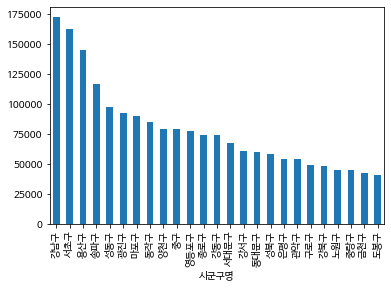

In [ ]:
# 시군구별 평균 거래 금액을 bar차트로 시각화 합니다.


In [ ]:
# 거래일자_년, 시군구명, 법정동을 기준으로 평균 거래 금액을 계산합니다.


mean
거래일자_년 시군구명 법정동                  
2020   강남구  압구정동    300038.250000
2019   강남구  압구정동    276796.473552
       용산구  한남동     268230.444444
2018   용산구  한남동     266147.163462
2020   서초구  반포동     263861.378254
...                           ...
2018   중구   장충동2가    11625.000000
       영등포구 영등포동3가   11550.000000
2020   영등포구 영등포동3가   11125.000000
       중구   장충동2가    10200.000000
2019   중구   장충동2가     9067.500000

[960 rows x 1 columns]

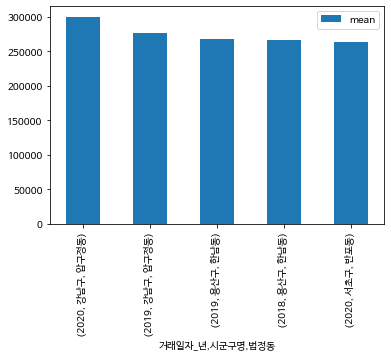

In [ ]:
# 위 데이터의 상위 5개를 시각화하세요
temp = df.groupby(by=['시군구명'])['거래금액'].agg(['sum','mean']).sort_values(by='mean', ascending=False)


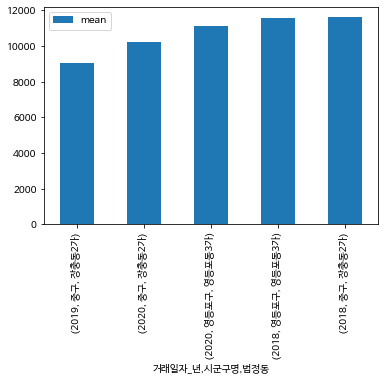

In [ ]:
# 위 데이터의 하위 5개를 시각화하세요


In [ ]:
# 거래일자_년과 시군구명을 기준으로 거래된 건수를 카운트하고, 거래된 수에 따라 내림차순으로 정렬하세요.


size
거래일자_년 시군구명      
2020   노원구   8724
2018   노원구   8563
2019   노원구   7300
       송파구   5784
2020   강서구   5656
...           ...
2019   중구    1000
2020   중구     984
       종로구    750
2018   종로구    722
2019   종로구    617

[75 rows x 1 columns]

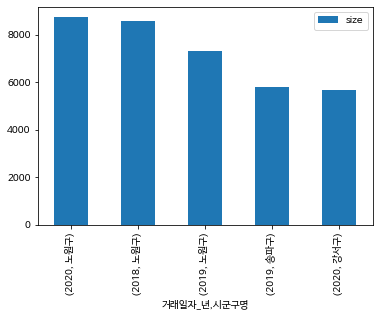

In [ ]:
# 상위 5개 지역을 시각화 합니다.


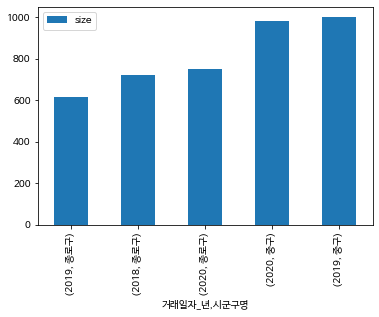

In [ ]:
# 하위 5개 지역을 시각화 합니다.


In [ ]:
# 피벗 테이블 이용하여 거래월과 시군구별 평균거래금액을 계산합니다.
df.pivot_table(index='시군구명',columns='거래일자_년', values='거래금액',aggfunc='mean')

거래일자_년,2018,2019,2020
시군구명,,,
강남구,153700.548635,180102.231602,180464.388080
강동구,65081.134950,73762.413785,83724.225036
강북구,42263.483855,46805.089734,55863.140417
강서구,53121.407765,60390.313736,67768.243105
관악구,47159.388169,53568.518293,62199.173271
광진구,80361.531828,92655.106659,106749.799197
구로구,43347.626068,51034.498012,54549.356806
금천구,37863.875321,43336.348697,47094.241590
노원구,38803.656662,44398.635342,52177.353278


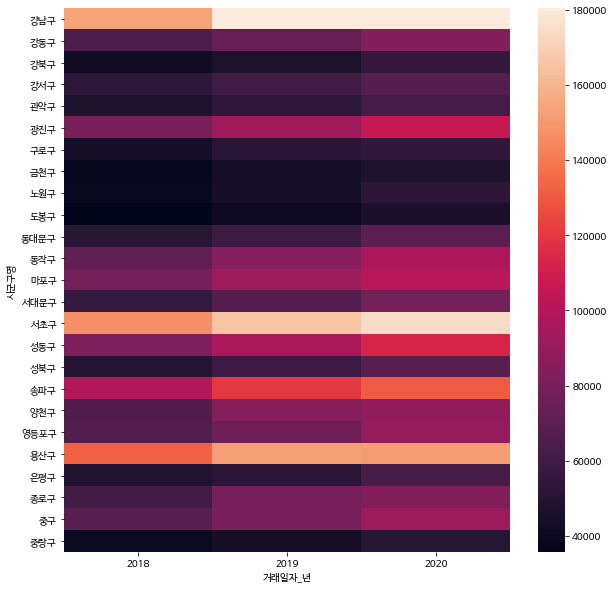

In [ ]:
# 위에서 계산된 결과(평균거래금액)를 heatmap 시각화를 합니다.
plt.figure(figsize=(10,10))
sns.heatmat(df.)



In [ ]:
# 거래월과 시군구별 거래량(거래 건 수)을 피벗테이블로 표현하세요


거래일자_년,2018,2019,2020
시군구명,,,
강남구,3516,4620,3641
강동구,3794,4106,4146
강북구,1982,1393,2108
강서구,5177,3742,5656
관악구,2857,2296,2574
광진구,1461,1697,1245
구로구,4565,3522,4871
금천구,1556,1497,1635
노원구,8563,7300,8724


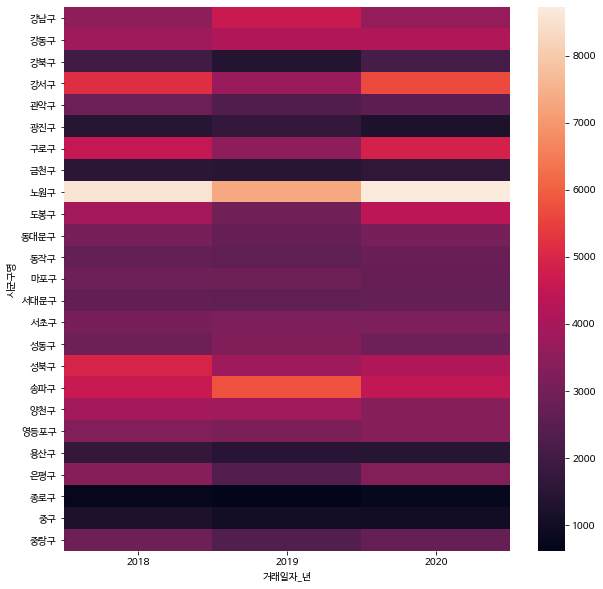

In [ ]:
# 위에서 계산된 결과(거래량)를 heatmap 시각화를 합니다.


In [ ]:
# 연도별 월별, 연도별 주차별 분석도 진행해보세요.



In [ ]:
# 시군구가 강남구인 데이터를 추출하세요

gangnam

,거래금액,건축년도,법정동,아파트,전용면적,지번,층,거래일자,전용면적(평),평형대,거래일자_년,거래일자_월,거래일자_주차,반기,분기,평당거래금액,시도명,시군구명
0,80000,2003,역삼동,세방하이빌1,59.770,771-4,5,2018-01-01,18.08,"(10, 20]",2018,1,1,상반기,1분기,4424.778761,서울특별시,강남구
1,265000,1983,대치동,개포우성1,127.610,503,11,2018-01-01,38.60,"(30, 40]",2018,1,1,상반기,1분기,6865.284974,서울특별시,강남구
2,180000,2008,삼성동,현대힐스테이트 2단지,84.236,50,19,2018-01-01,25.48,"(20, 30]",2018,1,1,상반기,1분기,7064.364207,서울특별시,강남구
3,145000,2002,도곡동,타워팰리스1,84.160,467,38,2018-01-02,25.46,"(20, 30]",2018,1,1,상반기,1분기,5695.208170,서울특별시,강남구
4,85000,1999,도곡동,매봉삼성,59.820,966,22,2018-01-02,18.10,"(10, 20]",2018,1,1,상반기,1분기,4696.132597,서울특별시,강남구


In [ ]:
# 피벗 테이블 이용하여 강남구의 거래월과 법정동의 평균거래금액을 계산합니다. (NA는 0으로 치환합니다.)


거래일자_년,2018,2019,2020
법정동,,,
개포동,142265.542169,173582.637097,179047.072993
논현동,113128.409091,105565.020513,115966.553571
대치동,190018.344488,216642.991128,222961.553763
도곡동,162840.223455,186524.099099,211291.416045
삼성동,172721.140940,184904.404145,157451.959459
세곡동,98439.534884,105815.811966,125148.245614
수서동,104323.175676,115681.227437,124315.462963
신사동,121770.212766,115463.636364,144523.529412
압구정동,263775.000000,276796.473552,300038.250000


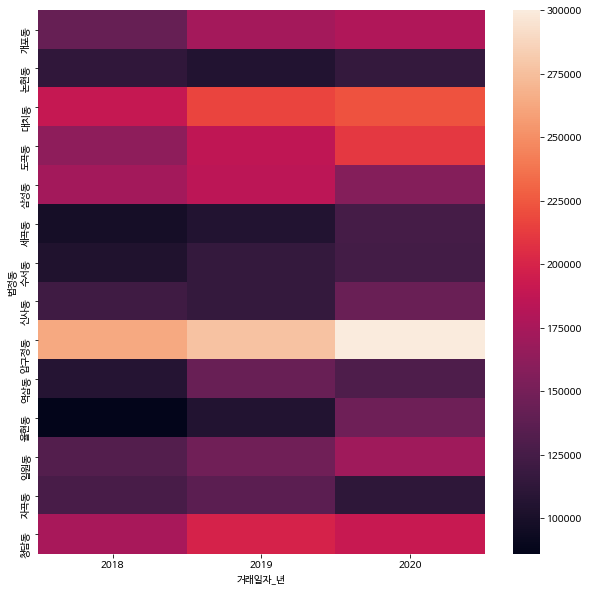

In [ ]:
# 강남구 법정동 평균 거래 금액을 heatmap 시각화 합니다. 


In [ ]:
# 강남구의 아파트 단지별 평균 거래 금액을 계산 후 상위 5개를 출력합니다.


,mean
아파트,
상지카일룸,640000.000000
효성빌라 청담101(A동),620000.000000
상지리츠빌카일룸2차,592500.000000
마크힐스이스트윙,553333.333333
상지리츠빌카일룸(65-4),533000.000000


In [ ]:
# 강남구의 아파트 단지별 평균 거래 금액을 계산 후 하위 5개를 출력합니다.


,mean
아파트,
이스턴오피스텔,19083.333333
요진와이시티미니,19906.461538
우림루미아트2,20011.111111
우림루미아트1,20260.000000
강남역우정에쉐르,20737.272727


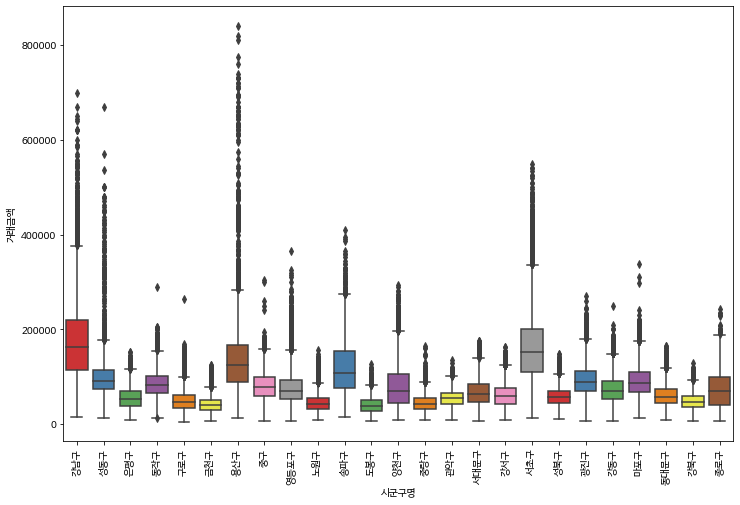

In [ ]:
# 시군구별 거래 금액을 boxplot을 이용하여 시각화 해보세요.


In [ ]:
# 평균 거래 금액이 높은 상위 30개의 아파트 단지를 추출하세요.


,mean
아파트,
상지카일룸,640000.000000
효성빌라 청담101(A동),620000.000000
상지리츠빌카일룸2차,592500.000000
마크힐스이스트윙,553333.333333
상지리츠빌카일룸(65-4),533000.000000
효성빌라 청담101(B동),530000.000000
청담 어퍼하우스,519500.000000
아펠바움,492166.666667
현대65동(대림아크로빌아파트),489000.000000


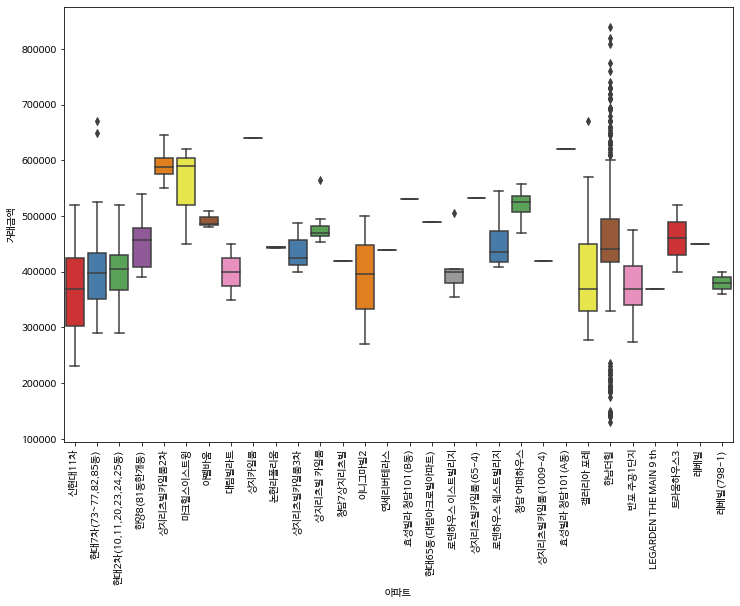

In [ ]:
# 평균 거래 금액이 높은 상위 30개의 아파트 단지에 해당하는 거래 데이터를 이용하여
# 거래 금액의 편차를 boxplot를 통해 표현하세요.


In [ ]:
# 평균 거래량(거래건수)이 높은 상위 30개의 아파트 단지를 추출하세요.


,count
아파트,
현대,2333
두산,1787
한신,1664
신동아,1503
벽산,1461
삼성래미안,1413
주공2,1170
삼성,1010
대우,1005


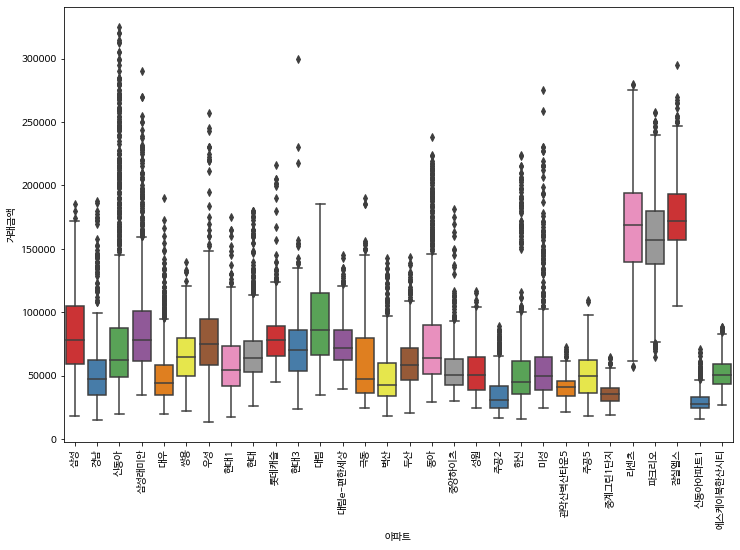

In [ ]:
# 평균 거래량 높은 상위 30개의 아파트 단지에 해당하는 거래 데이터를 이용하여 
# 거래 금액 건 수의 편차를 boxplot를 통해 표현하세요.
